# Generating Merton Jump Diffusion Paths

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Example usage
T = 1       # Total time
n = 100     # Number of time steps
r = 0.05   # Drift coefficient
σ = 0.25 # Volatility coefficient
S0 = 100    # Initial stock value
dim = 100    # Number of paths to simulate
λ = 0.4
α = -0.5
β = 0.4

In [3]:
def MertonJumpDiffusion(T,n,r,σ,α,β,λ,S0,dim):
    """
    Generate Merton Jump Diffusion paths.

    Parameters:
    S0 (float): Initial asset value
    T (float): Total time period
    r (float): Risk-free interest rate
    α (float): Mean of log-normal jump size
    β (float): Volatility of log-normal jump size
    σ (float): Volatility coefficient for diffusion
    λ (float): Intensity rate of the Poisson process
    n (int): Number of time steps
    dim (int): Number of paths to simulate

    Returns:
    np.ndarray: Simulated paths of the asset price
    """
    
    Δ = T/n  # equidistant tep length
    Z_1 = np.random.normal(0, 1, (n, dim))  
    S = np.full((n+1, dim), np.nan)  
    S[0,:] = np.log(S0) 
    c = r - 0.5*σ**2 - λ*(np.exp(α + 0.5*β**2) - 1)
    for i in range(n):
        N = np.random.poisson(λ*Δ, dim)  # Poisson process for the number of jumps
        # Jump sizes for each path
        M = np.zeros(dim)
        for j in range(dim):
            if N[j] > 0: # if jump
                M[j] = α*N[j] + β*np.sqrt(N[j])*np.random.normal()

        # Calculate the combined diffusion and jump process
        S[i+1,:] = S[i,:] + c*Δ + σ*np.sqrt(Δ)*Z_1[i,:] + M
    S = np.exp(S) 
    
    return S

Merton_paths = MertonJumpDiffusion(T,n,r,σ,α,β,λ,S0,dim)

In [4]:
# Define time interval 
time = np.linspace(0, T, n+1)
tt = np.broadcast_to(time[:, None], (n+1, dim))

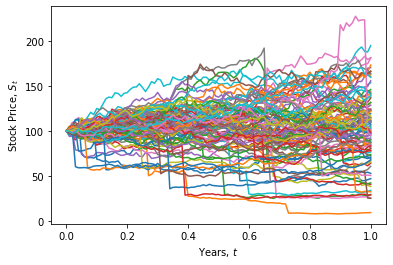

In [5]:
# plot
plt.plot(tt, Merton_paths)
plt.xlabel("Years, $t$")
plt.ylabel("Stock Price, $S_t$")
plt.show()